In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(0) Load

In [8]:
path = '/Users/robertpinochetgomez/GitHub/time-series-analysis/00-data'

df_exports = pd.read_parquet(f'{path}/df_nsc_2025_until_w18.parquet')
df_exports['Week'] = df_exports['Week'].astype('int32')
df_exports.head()

,Country,Volume (KG),Kr/kg,Week,Product,Year,Continent
0,TOTALT,18407,67.23,1,FRESH WHOLE HON,2023,UNCLASSIFIED
1,EU27,13183,64.74,1,FRESH WHOLE HON,2023,EUROPE
2,POLEN,2223,61.44,1,FRESH WHOLE HON,2023,EUROPE
3,FRANKRIKE,2430,66.05,1,FRESH WHOLE HON,2023,EUROPE
4,NEDERLAND,1533,65.60,1,FRESH WHOLE HON,2023,EUROPE


(1) Overall Exportations from Norway to Key Markets Over Time 2023 - 2024

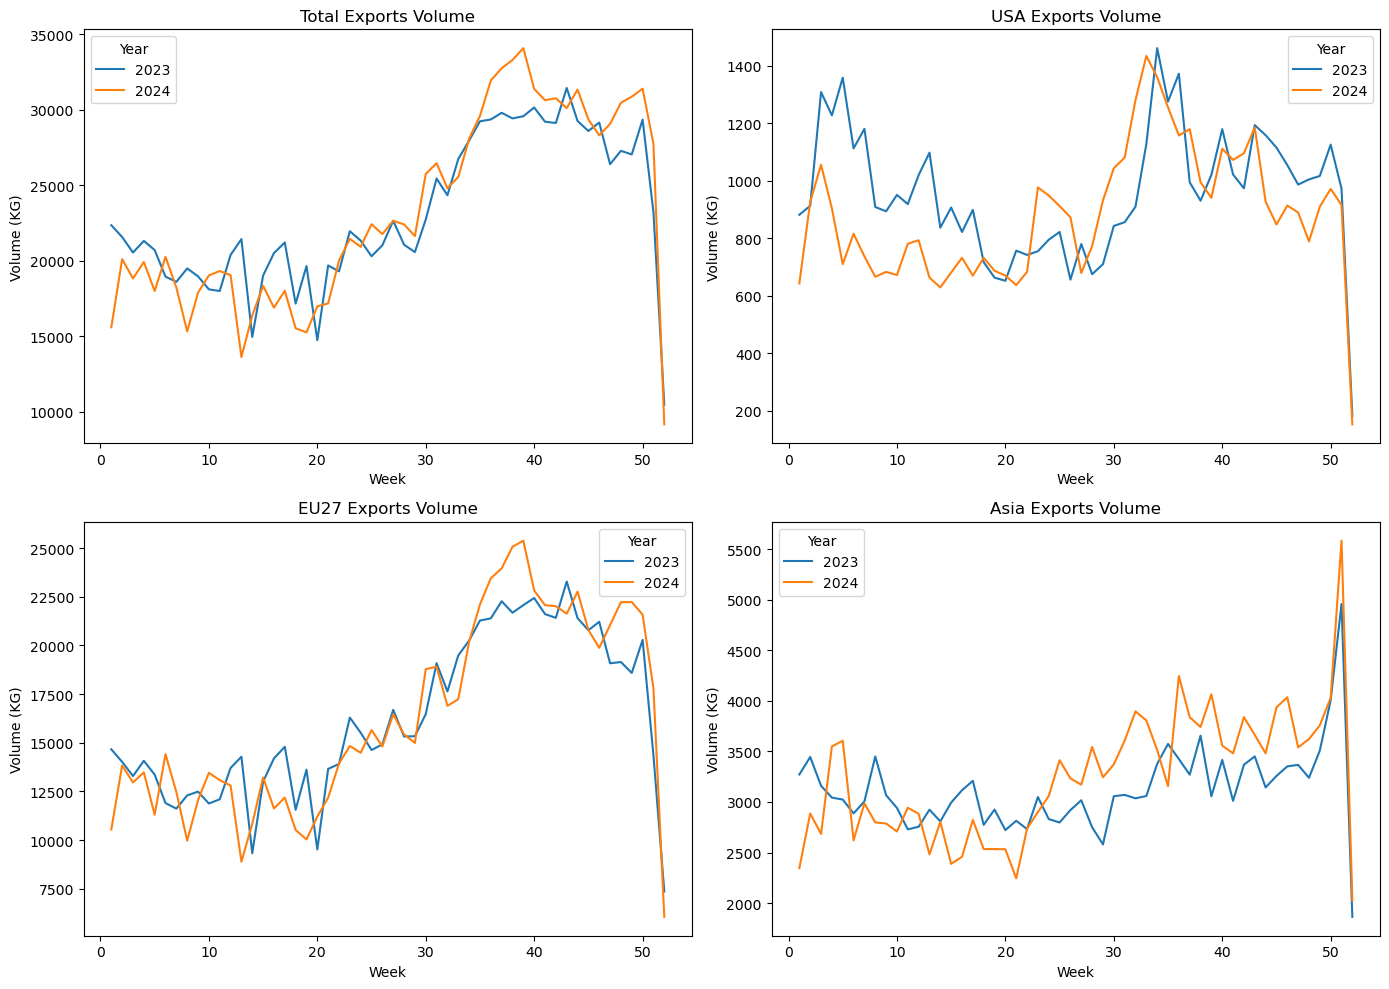

In [10]:
# Define the filters and corresponding titles
filters = [
    {'column': 'Country', 'value': 'TOTALT', 'title': 'Total Exports Volume'},
    {'column': 'Country', 'value': 'U S A', 'title': 'USA Exports Volume'},
    {'column': 'Country', 'value': 'EU27', 'title': 'EU27 Exports Volume'},
    {'column': 'Continent', 'value': 'ASIA', 'title': 'Asia Exports Volume'}
]

# Create the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Generate each subplot
for i, f in enumerate(filters):
    df_filtered = df_exports.loc[
        (df_exports['Year'].isin([2023, 2024])) &
        (df_exports[f['column']] == f['value'])
    ]

    df_grouped = df_filtered.groupby(['Year', 'Week']).agg(
        VOLUMEKG=('Volume (KG)', 'sum')
    ).reset_index()

    # Pivot for line plotting by year
    pivot_df = df_grouped.pivot(index='Week', columns='Year', values='VOLUMEKG')
    pivot_df.plot(ax=axes[i], title=f['title'])

    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Volume (KG)')
    axes[i].legend(title='Year')

# Adjust layout
plt.tight_layout()
plt.show()


Con lo anterior, podemos concluir que el total de las exportaciones de salmón noruego posee estacionalidad desde la semana 1 hasta la semana 19-20 apróximadamente. Lo anterior se explica por que durante el primer trimestre ocurre el invierno noruego, en donde las temperaturas son más frías, lo que ralentiza el crecimiento del salmón, por ende, menor oferta. Además, baja demanda post navideña (especialmente por Europa). Y las condiciones climáticas del invierno dificultan las operaciones de cosecha y transporte. 


Para luego, incrementar con una tendencia al alza sostenida hasta la semana 35. Esto se da, porque comienza la primavera-verano noruego, por lo que las temperaturas comienzan a subir favoreciendo el crecimiento, lo cual permite una mayor cosecha. También existe un aumento en la demanda global, en mercado claves como Europa, Japón y USA. Y a su vez, el mejor clima, facilita las operaciones de cosecha y transporte. 


A partir de las semanas, 36-50, se logra el máximo de nivel de producción, en donde se ven términos de ciclos productivos (1 año de cultivo), por cual se tienen más centros con pesos de cosecha óptimos para la demanda mundial. También, se estabalizan los consumos de para los mercados claves, surgiendo muchas necesidades por festivivades de fin de año, como también asegurar stock, etc. 

Finalmente, ésto cae abruptamente porque se viven las celebraciones de navidad y año nuevo, en donde se tienen menos días de producción por vacaciones, menor demanda (al ya estar satisfecha) y mayores costos logísticos

| Región   | Patrón                       | Eventos Clave                                               | Logística         |
| -------- | ---------------------------- | ----------------------------------------------------------- | ----------------- |
| **EU27** | Estacional fuerte, dominante | Navidad, Pascua, Verano                                     | Mix avión/barco   |
| **USA**  | Volátil, con picos marcados  | Super Bowl, verano, Labor Day, competencia con salmón local | Avión (fresco)    |
| **Asia** | Estable, tendencia creciente | Año Nuevo Chino (adelantado), demanda B2B continua          | Barco (congelado) |
